# Sistemas Inteligentes

## Laboratório 5 - Otimização

Aplicação de __Algoritmo Genético__ na solução do problema __OneMax__, que visa encontrar uma solução com a maior quantidade possível de números iguais a 1.

Será explorada a biblioteca __DEAP__.

## Desenvolvimento

### Importações

Importe:
- a biblioteca __random__
- e os pacotes _base_, _creator_, _tools_ e _algorithms_ da biblioteca __deap__
- a biblioteca __numpy__ como __np__
- o pacote __matplotlib.pyplot__ como __plt__

Obs: dependendo das versões dos pacotes, pode ser exibido um aviso sobre uma possível lentidão, mas esse aviso pode ser ignorado por enquanto.

In [2]:
### OK ###
#!pip install deap

import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

Abaixo estão algumas configurações sobre os gráficos deste Notebook.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)
plt.style.use('seaborn-notebook')

### Criação do Tipo

Crie os tipos:
- FitnessMax
- Individual

Para criar, utilize a função __create__ do módulo ___creator___. Os argumentos são os seguintes:
- o primeiro argumento da função é o nome do tipo a ser criado;
- o segundo argumento é a classe base da qual o novo tipo criado deve herdar;
- os demais argumentos, que são opcionais, são membros a serem adicionados ao novo tipo.

Para o tipo "FitnessMax", herde de __base.Fitness__ e adicione o atributo de pesos __weights=(1.0,)__.

Para o tipo "Individual", herde de __list__ e adicione o atributo __fitness=creator.FitnessMax__, que é justamente o que acabou de ser criado.

Obs: pesos e quaisquer outros valores retornados de funções criadas com a biblioteca DEAP devem ser iteráveis; por isso, inclua a vírgula ao final do último valor de saída para esses casos.

In [4]:
### OK ###
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

Apenas para fins didáticos, dado que não é algo necessário para rodar o código, crie um indivíduo chamado __ind__ com a função __creator.Individual__ recém criada. Utilize como argumento dessa função uma lista qualquer, de pelo menos 4 posições, apenas com valores 0 e 1; então, imprima a lista, o tipo da lista e o tipo do objeto __ind.fitness__.

In [5]:
ind = creator.Individual([1, 0, 1, 1, 0])

print(ind)
print(type(ind))
print(type(ind.fitness))

[1, 0, 1, 1, 0]
<class 'deap.creator.Individual'>
<class 'deap.creator.FitnessMax'>


### Criação da Toolbox

A Toolbox armazena funções com seus respectivos argumentos utilizando apelidos para uso simplificado no algoritmo. Para criar a Toolbox, utilize a função __base.Toolbox__.

Para registrar as funções com seus apelidos, utilize a função __toolbox.register__ e seus argumentos são os seguintes:
- o primeiro, obrigatório, é o apelido;
- o segundo, obrigatório, é a função à qual o apelido será associado;
- os demais, opcionais, são argumentos a serem utilizados quando a função for chamada pelo apelido no algoritmo.

O primeiro apelido, "attr_bool", chama a função __random.randint__ com os argumentos 0 e 1 para sortear valores no intervalo [0, 1], ou seja, os valores serão apenas 0 ou 1. Você pode pensar nisso como bits.

O segundo apelido, "individual", chama a função __tools.initRepeat__ para preencher uma classe Individual com o que é produzido por 10 chamadas da função __toolbox.attr_bool__, que acabou de ser criada.

O terceiro apelido, "population", chama novamente a funçã0 __tools.initRepeat__ para fazer listas com base nos resultados da função __toolbox.individual__, apelidada anteriormente.

In [6]:
### OK ###
toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 25) # tamanho do cromossomo
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

Agora execute o bloco a seguir para verificar o funcionamento das funções apelidadas com a Toolbox criada.

In [7]:
bit = toolbox.attr_bool()
ind = toolbox.individual()
pop = toolbox.population(n=3)

print("bit is of type %s and has value\n%s" % (type(bit), bit))
print("ind is of type %s and contains %d bits\n%s" % (type(ind), len(ind), ind))

bit is of type <class 'int'> and has value
0
ind is of type <class 'deap.creator.Individual'> and contains 25 bits
[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0]


In [8]:
print("pop is of type %s and contains %d individuals" % (type(pop), len(pop)))
for indiv in pop:
    print(indiv)

pop is of type <class 'list'> and contains 3 individuals
[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]
[1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]


### Função de Avaliação

Para o caso do problema OneMax, trata-se de uma função bastante simples, dado que apenas conta a quantidade de números 1 em um indivíduo. Chame a função de __evalOneMax__, que terá apenas um argumento, o indivíduo.

Obs: lembre-se de que o valor retornado precisa ser iterável, então finalize a saída com uma vírgula.

In [9]:
### OK ###
def evalOneMax(individual):
    return sum(individual),

### Operadores Genéticos

Vamos registrar alguns operadores com apelidos que facilitem sua utilização futuramente, da mesma forma que foi feito na criação da Toolbox. Serão 4 ao todo.

A primeira, "evaluate", refere-se à função de avaliação __evalOneMax__; como é uma função de apenas um único argumento, não é necessário atribuir nada por agora, já que isso será feito depois, quando for necessário.

A segunda, "mate", refere-se à função de _Crossover_ de dois pontos __tools.cxTwoPoint__, que também não precisa de argumentos extras por enquanto.

A terceira, "mutate", refere-se à função de mutação __tools.mutFlipBit__, que provoca mutações; recomenda-se utilizar o argumento __indpb=0.10__ para import 10% de chance de mutação a cada atributo.

A quarta, "select", é o operador de seleção __toolbox.selTournament__; utilize o argumento __tournsize=3__.

In [10]:
### OK ###
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

Apenas para testar a funcionalidade, crie um indivíduo chamado __ind__, imprima-o na tela, então cause uma mutação em __ind__ e exiba o resultado após a mutação.

In [11]:
ind = toolbox.individual()
print("Indivíduo Inicial:\n", ind)
toolbox.mutate(ind)
print("Indivíduo Mutado:\n", ind)

Indivíduo Inicial:
 [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]
Indivíduo Mutado:
 [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


É importante destacar o fato de que os operadores podem fazer modificações nos indivíduos, ou seja, caso não seja feita uma cópia do indivíduo, os indivíduos anteriores podem se perder.

Para salvar os indivíduos, pode-se utilizar a função __toolbox.clone__, já presente em qualquer toolbox, com o argumento sendo o indivíduo a ser copiado, assim como é feito na célula abaixo.

In [12]:
mutant = toolbox.clone(ind)
print("mutant is ind:", mutant is ind)
print("mutant == ind:", mutant == ind)

mutant is ind: False
mutant == ind: True


### Evoluindo a População

Defina a função __main__, onde será feita toda a parte principal do programa. As declarações anteriores estão guardadas globalmente neste Notebook, logo, podem ser utilizadas desde então.

O programa principal, basicamente, gera uma população e a utiliza no algoritmo para evoluir a uma solução.

Assim, crie uma população chamada __pop__ utilizando a função __toolbox.population__ com 50 indivíduos, ou seja, __n=50__ como argumento; e crie um Hall da fama chamado __hof__ com o uso da função __tools.HallOfFame(1)__.

Para preparar as estatísticas, que também devem fazer parte da definição da função __main__, crie um objeto chamado __stats__ e atribua a ele a função __tools.Statistics__ com a função lambda __lambda ind: ind.fitness.value__ como argumento.

Com o objeto __stats__ criado, registre nele as funções de média, mínimo e máximo (da biblioteca __numpy__) com os seguintes respectivos nomes: "avg", "min" e "max".

Agora, atribuindo às variáveis __pop__ e __logbook__, utilize a função __algorithms.eaSimple__ (de duas saídas) com os seguintes argumentos de entrada:
- a população, __pop__
- a toolbox, __toolbox__
- o ponto (percentual) separador de Crossover, __cxpb=0.5__
- a probabilidade de mutação de cada atributo, __mutpb=0.2__
- o número de gerações, __ngen=10__
- o objeto de estatísticas, __stats=stats__
- o objeto de Hall da fama, __halloffame=hof__
- o argumento de impressão completa por iteração, __verbose=True__

A saída da função __main__ deve ser composta por __pop__, __logbook__ e __hof__.

In [13]:
### OK ###
### Alterar os parâmetros da função algorithms.eaSimple e checar os resultados
def main():
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb = 0.5, mutpb=0.2, 
                                   ngen=50, stats=stats, halloffame=hof, verbose=True)
    return pop, log, hof

Use o código a seguir para calcular os resultados e exibí-los.

gen	nevals	avg  	std   	min	max
0  	50    	12.72	2.4903	8  	19 
1  	32    	14.6 	1.86548	11 	19 
2  	25    	15.88	1.42324	11 	19 
3  	28    	16.82	1.1435 	14 	20 
4  	19    	17.02	1.87072	9  	20 
5  	32    	17.68	1.91249	10 	21 
6  	26    	18.2 	2.26274	12 	21 
7  	28    	19.2 	2.08806	14 	22 
8  	29    	20.2 	2.00998	14 	23 
9  	22    	20.86	2.05922	15 	24 
10 	28    	21.68	1.82691	16 	24 
11 	33    	21.86	1.85483	17 	24 
12 	29    	22.42	2.40075	13 	24 
13 	26    	23.06	2.16712	16 	24 
14 	27    	23.72	0.938936	19 	24 
15 	30    	23.5 	1.40357 	18 	24 
16 	29    	23.26	2.03774 	16 	24 
17 	34    	22.84	2.09151 	16 	24 
18 	25    	23   	1.91833 	17 	24 
19 	34    	23.26	1.61009 	17 	24 
20 	18    	23.24	1.94484 	16 	24 
21 	34    	23.8 	0.848528	19 	24 
22 	32    	23.2 	2       	16 	24 
23 	30    	22.88	2.13204 	17 	24 
24 	29    	23.24	1.80621 	18 	24 
25 	37    	22.54	2.84401 	11 	24 
26 	30    	23.34	1.73908 	17 	24 
27 	27    	23.08	1.92707 	15 	24 
28 	24    	22.98	2.00489 	16 	2

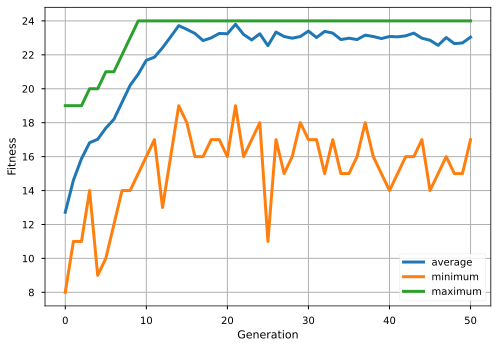

In [14]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average", linewidth=3)
    plt.plot(gen, min_, label="minimum", linewidth=3)
    plt.plot(gen, max_, label="maximum", linewidth=3)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

## Alterando parâmetros do algoritmo genético

#### npop = 100, cxpb = 0.1, mutpb=0.1
Demora para convergir

In [15]:
# Definição da função main, atribuição de Parâmetros
def main():
    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb = 0.1, mutpb=0.1, 
                                   ngen=50, stats=stats, halloffame=hof, verbose=True)
    return pop, log, hof

In [16]:
# Criando variáveis vazias no escopo global
pop, log, hof = (),(),()

# Processamento Principal
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen	nevals	avg  	std    	min	max
0  	100   	12.73	2.57237	7  	20 
1  	18    	14.76	2.0402 	11 	20 
2  	13    	16.25	1.41686	11 	19 
3  	24    	17.12	1.31362	12 	19 
4  	22    	17.84	1.14647	13 	20 
5  	16    	18.41	0.837795	15 	20 
6  	18    	18.58	1.16773 	13 	20 
7  	23    	19.07	1.08862 	14 	22 
8  	10    	19.6 	0.989949	15 	22 
9  	21    	19.8 	1.45602 	14 	22 
10 	19    	20.1 	1.74069 	13 	22 
11 	24    	21.01	1.23689 	17 	23 
12 	16    	21.55	1.44482 	15 	23 
13 	12    	21.89	1.03822 	16 	23 
14 	20    	21.83	1.3788  	14 	23 
15 	22    	21.81	1.49462 	16 	23 
16 	26    	22.03	1.83005 	16 	23 
17 	21    	22.72	1.01074 	17 	23 
18 	28    	22.41	1.75553 	16 	24 
19 	19    	22.66	1.23467 	16 	24 
20 	20    	22.84	0.976934	17 	24 
21 	18    	22.62	1.5734  	14 	24 
22 	21    	22.64	1.90011 	13 	24 
23 	22    	22.69	1.83137 	15 	24 
24 	18    	23.23	1.66045 	14 	24 
25 	16    	23.64	1.15343 	18 	24 
26 	23    	23.73	0.914932	20 	24 
27 	20    	23.61	1.30303 	18 	24 
28 	19    	23.56	1.4

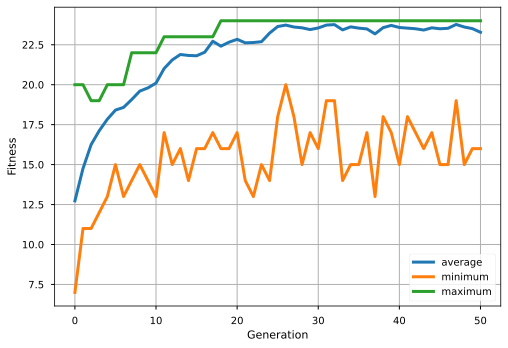

In [17]:
# Plotando os resultados
gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average", linewidth=3)
plt.plot(gen, min_, label="minimum", linewidth=3)
plt.plot(gen, max_, label="maximum", linewidth=3)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.grid(True)

#### npop = 100, cxpb = 0.7, mutpb=0.7
Dificuldade de convergir

In [18]:
# Definição da função main, atribuição de Parâmetros
def main():
    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb = 0.7, mutpb=0.7, 
                                   ngen=50, stats=stats, halloffame=hof, verbose=True)
    return pop, log, hof

In [19]:
# Criando variáveis vazias no escopo global
pop, log, hof = (),(),()

# Processamento Principal
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen	nevals	avg  	std    	min	max
0  	100   	12.69	2.23917	7  	18 
1  	81    	14.28	1.87126	9  	19 
2  	87    	15.02	2.2135 	9  	22 
3  	91    	15.95	1.92029	11 	23 
4  	97    	15.64	2.19326	9  	23 
5  	91    	15.92	1.86376	10 	19 
6  	98    	16.16	2.25708	10 	21 
7  	93    	16.34	2.597  	10 	22 
8  	89    	16.7 	2.41039	10 	22 
9  	87    	17.36	2.26945	11 	22 
10 	96    	17.17	2.60789	10 	23 
11 	95    	17.18	2.42231	12 	23 
12 	96    	17.28	2.38361	12 	22 
13 	90    	17.36	2.25175	12 	22 
14 	93    	17.48	2.22926	12 	22 
15 	89    	17.57	2.51895	10 	22 
16 	86    	17.93	2.4668 	13 	22 
17 	90    	18.11	2.54124	11 	24 
18 	92    	17.8 	2.56515	12 	23 
19 	83    	17.78	2.61373	11 	23 
20 	94    	18.09	2.37527	10 	24 
21 	89    	18.14	2.49006	12 	24 
22 	90    	17.91	2.58107	11 	24 
23 	86    	18.12	2.801  	12 	24 
24 	92    	17.93	2.73223	10 	23 
25 	97    	17.72	2.72059	10 	23 
26 	90    	18.08	2.12452	13 	23 
27 	94    	17.74	2.23884	10 	22 
28 	92    	17.22	2.71875	10 	23 
29 	93    

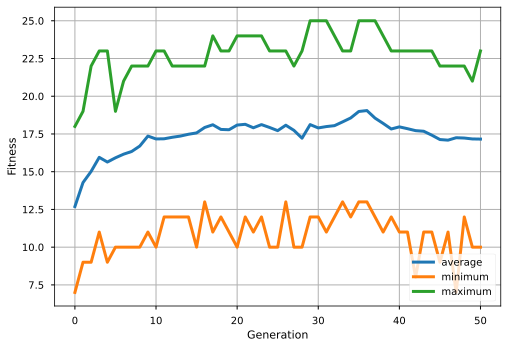

In [20]:
# Plotando os resultados
gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average", linewidth=3)
plt.plot(gen, min_, label="minimum", linewidth=3)
plt.plot(gen, max_, label="maximum", linewidth=3)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.grid(True)

#### npop = 100, cxpb = 0.6, mutpb=0.1
Converge rapidamente

In [21]:
# Definição da função main, atribuição de Parâmetros
def main():
    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb = 0.6, mutpb=0.1, 
                                   ngen=50, stats=stats, halloffame=hof, verbose=True)
    return pop, log, hof

In [22]:
# Criando variáveis vazias no escopo global
pop, log, hof = (),(),()

# Processamento Principal
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

gen	nevals	avg  	std    	min	max
0  	100   	12.67	2.38351	8  	17 
1  	64    	14.6 	2.00998	9  	20 
2  	61    	16.16	1.64146	11 	20 
3  	62    	17.26	1.70658	13 	21 
4  	57    	18.37	1.49436	13 	22 
5  	57    	19.51	1.50662	15 	23 
6  	63    	20.31	1.58553	13 	23 
7  	60    	21.23	1.1212 	16 	23 
8  	61    	21.51	1.8248 	14 	24 
9  	59    	21.99	1.75211	15 	24 
10 	64    	22.87	1.07382	18 	25 
11 	61    	23.11	1.39208	17 	25 
12 	65    	23.56	1.55126	17 	25 
13 	60    	23.75	1.75713	16 	25 
14 	64    	24.13	1.74731	18 	25 
15 	65    	24.42	1.55035	17 	25 
16 	68    	24.52	1.54583	18 	25 
17 	68    	24.43	1.83442	15 	25 
18 	58    	24.48	1.59675	18 	25 
19 	61    	24.6 	1.40712	17 	25 
20 	65    	24.9 	0.714143	19 	25 
21 	65    	24.38	1.83728 	14 	25 
22 	64    	24.47	1.57134 	17 	25 
23 	69    	24.01	2.22484 	17 	25 
24 	78    	24.7 	1.21244 	18 	25 
25 	55    	24.43	1.95579 	16 	25 
26 	56    	24.56	1.61443 	15 	25 
27 	66    	24.42	1.81207 	15 	25 
28 	66    	24.51	1.63398 	17 	25 
2

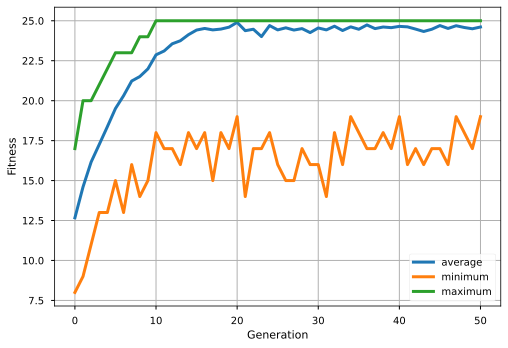

In [23]:
# Plotando os resultados
gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average", linewidth=3)
plt.plot(gen, min_, label="minimum", linewidth=3)
plt.plot(gen, max_, label="maximum", linewidth=3)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.grid(True)